In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df0 = pd.read_csv("train.csv")
df1 = pd.read_csv("test.csv")

In [3]:
df0["Set"] = [0]*len(df0)
df1["Set"] = [1]*len(df1)

In [4]:
df = pd.merge(df0, df1, how="outer")

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Set'],
      dtype='object')

In [6]:
## 일관된 형식을 위해 Name2 생성
df["Name2"] = df["Name"].replace({
    'Duff Gordon, Lady. (Lucille Christiana Sutherland) ("Mrs Morgan")':
    'Duff Gordon, Mrs. Morgan',
    'Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")':
    'Duff Gordon, Mr. Morgan',
    'Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")':
    'Mayne, Mrs. Villiers',
    'Phillips, Miss. Kate Florence ("Mrs Kate Louise Phillips Marshall")':
    'Phillips, Mrs. Kate Louise Phillips Marshall',
    'Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)':
    'Rothes, Countess. Lucy Noel Martha Dyer-Edwards',
    'Yrois, Miss. Henriette ("Mrs Harbeck")':
    'Yrois, Mrs. Harbeck'})

In [7]:
## Title
df["Title"] = df["Name2"].apply(lambda x: x.split(",")[1].strip().split(".")[0].strip())
df["Title"] = df["Title"].replace({"Don": "Mr", "Dona": "Ms", "Mlle": "Ms", "Mme": "Ms"})

In [8]:
pd.crosstab(index=df["Title"], columns="Frequency")

col_0,Frequency
Title,
Capt,1
Col,4
Countess,1
Dr,8
Jonkheer,1
Major,2
Master,61
Miss,258
Mr,759


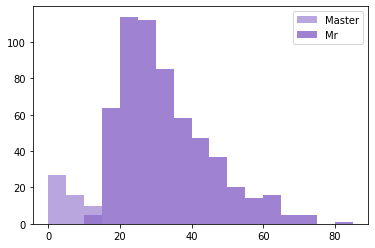

In [9]:
## Age 분포: Master vs. Mr
bins = range(0, 90, 5)
df[df["Title"]=="Master"]["Age"].hist(bins=bins, color="#B39DDB", alpha=0.9)
df[df["Title"]=="Mr"]["Age"].hist(bins=bins, color="#9575CD", alpha=0.9)
plt.legend(["Master", "Mr"])
plt.grid(False)

In [10]:
round(df[(df["Title"]=="Master")|(df["Title"]=="Mr")].groupby("Title")["Age"].describe(), 2)

,count,mean,std,min,25%,50%,75%,max
Title,,,,,,,,
Master,53.0,5.48,4.16,0.33,2.0,4.0,9.0,14.5
Mr,583.0,32.29,12.42,11.00,23.0,29.0,39.0,80.0


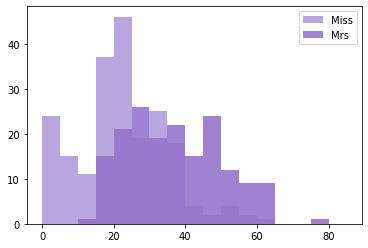

In [11]:
## Age 분포: Miss vs. Mrs
bins = range(0, 90, 5)
df[df["Title"]=="Miss"]["Age"].hist(bins=bins, color="#B39DDB", alpha=0.9)
df[df["Title"]=="Mrs"]["Age"].hist(bins=bins, color="#9575CD", alpha=0.9)
plt.legend(["Miss", "Mrs"])
plt.grid(False)

In [12]:
round(df[(df["Title"]=="Miss")|(df["Title"]=="Mrs")].groupby("Title")["Age"].describe(), 2)

,count,mean,std,min,25%,50%,75%,max
Title,,,,,,,,
Miss,208.0,21.78,12.31,0.17,15.0,22.0,30.0,63.0
Mrs,174.0,36.80,12.93,14.00,26.0,35.0,46.5,76.0
